In [82]:
import gym
import numpy as np
import random

env = gym.make("FrozenLake-v0", map_name='4x4', is_slippery=False)

Funkcja generująca politykę deterministyczną:

In [129]:
def create_random_det_policy(env):
    policy = {}
    for key in range(0, env.observation_space.n):
        policy[key] = np.random.randint(4);
    return policy

Testujemy:

In [130]:
policy = create_random_det_policy(env)
policy

{0: 1,
 1: 3,
 2: 0,
 3: 2,
 4: 2,
 5: 1,
 6: 0,
 7: 1,
 8: 0,
 9: 3,
 10: 3,
 11: 0,
 12: 0,
 13: 1,
 14: 1,
 15: 2}

Wygenerowanie słownika reprezentującego funkcję Q:

In [85]:
def create_state_action_dictionary(env, policy):
    Q = {}
    for key in policy.keys():
         Q[key] = {a: 0.0 for a in range(0, env.action_space.n)}
    return Q

In [102]:
Q = create_state_action_dictionary(env, policy)

In [103]:
Q

{0: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 1: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 2: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 3: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 4: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 5: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 6: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 7: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 8: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 9: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 10: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 11: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 12: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 13: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 14: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 15: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}}

Funkcja generująca epizod:

In [88]:
def generate_episode_det(env, policy): 
    env.reset()
    episode = []
    finished = False

    while not finished:
        s = env.s
        #s = np.random.randint(16)
        #print(s)

        timestep = []
        timestep.append(s)
        
        action = policy[s]
           
        _, reward, finished, _ = env.step(action)
        
        timestep.append(action)
        timestep.append(reward)

        episode.append(timestep)
        
    return episode

Testujemy:

In [89]:
print("LEFT = 0 DOWN = 1 RIGHT = 2 UP = 3")
for i in range(10):
  print("Epizod ",i,": ",generate_episode_det(env, policy))

LEFT = 0 DOWN = 1 RIGHT = 2 UP = 3
Epizod  0 :  [[0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0, 3, 0.0], [0

**Czy pierwsza wizyta w danym stanie?**

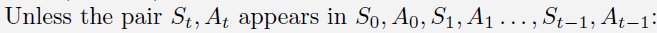

In [90]:
policy = create_random_det_policy(env)   
episode = generate_episode_det(env, policy) 
print(episode)

for time_step in reversed(range(0, len(episode))):

  S_t, A_t, R_t = episode[time_step] 
  state_action = (S_t, A_t)

  if not state_action in [(x[0], x[1]) for x in episode[0:time_step]]:
      print("t=",time_step," pierwsza wizyta w (s,a): ",state_action)

[[0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0], [1, 0, 0.0], [0, 2, 0.0]

**Słownik, którego kluczami są pary (stan,akcja) tzn. (S,A) a wartościami listy zwrotów G**

image.png

In [91]:
Returns = {(3,2):[4,5,-1],(1,1):[2,3,6,7,1],(6,3):[2,-1,3,1]} 

In [92]:
Returns = {}

Returns[(3,1)]=[3]
print(Returns)

Returns[(3,1)].append(4)
print(Returns)

Returns[(3,1)].append(8)
print(Returns)

{(3, 1): [3]}
{(3, 1): [3, 4]}
{(3, 1): [3, 4, 8]}


In [93]:
Returns[(4,2)]=[7]
print(Returns)

Returns[(4,2)].append(-4)
print(Returns)

Returns[(4,2)].append(2)
print(Returns)

{(3, 1): [3, 4, 8], (4, 2): [7]}
{(3, 1): [3, 4, 8], (4, 2): [7, -4]}
{(3, 1): [3, 4, 8], (4, 2): [7, -4, 2]}


In [149]:
#Q = np.zeros((env.nS,env.nA))
Pi = np.zeros(env.nS)
Returns = {}
for u in range(10000):
  y=1

  policy = create_random_det_policy(env)   
  episode = generate_episode_det(env, policy) 
  #print(episode)
  G=0
  for time_step in reversed(range(0, len(episode))):

   S_t, A_t, R_t = episode[time_step] 
   state_action = (S_t, A_t)
   G = y*G + R_t

 
   if not state_action in [(x[0], x[1]) for x in episode[0:time_step]]:
       #print("t=",time_step," pierwsza wizyta w (s,a): ",state_action)
       if not state_action in Returns.keys():
        Returns[state_action]=[G]      
       else :
        Returns[state_action].append(G)    
       Q[state_action] = np.average(Returns[state_action])
       # Pi[state_action[0]] = np.argmax([state_action])

       # Q[S_t][A_t] = sum(Returns[state_action]) / len(Returns[state_action]) # Average reward across episodes

            # Finding the action with maximum value.
       Q_list = list(map(lambda x: x[1], Q[S_t].items()))    
       max_Q = np.argmax(Q_list)  
       Pi[S_t]=max_Q

In [142]:
Q_list

[0.0, 0.0024459845087647777, 0.0003961965134706815, 0.0]

In [ ]:
Returns

In [97]:
Q

array([[0.        , 0.0011957 , 0.00197006, 0.        ],
       [0.        , 0.        , 0.00777605, 0.        ],
       [0.        , 0.02840909, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.00505902, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.09433962, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.0234375 , 0.        ],
       [0.        , 0.04166667, 0.06451613, 0.        ],
       [0.        , 0.31818182, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.25      , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [145]:
Pi

array([1., 2., 1., 0., 1., 0., 1., 0., 2., 2., 1., 0., 0., 2., 2., 0.])

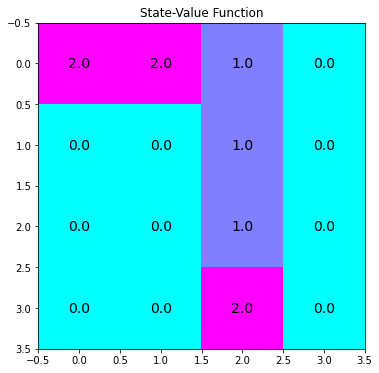

In [151]:
from plot_utils import plot_values
plot_values(Pi)